# Assignment 11: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

<AxesSubplot:xlabel='age', ylabel='height'>

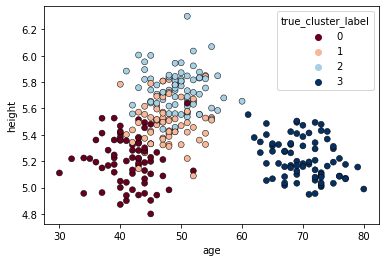

In [2]:
df = pd.read_csv('age_height_data.csv')

sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'true_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Question 2 (10 Mark)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

<AxesSubplot:xlabel='age', ylabel='height'>

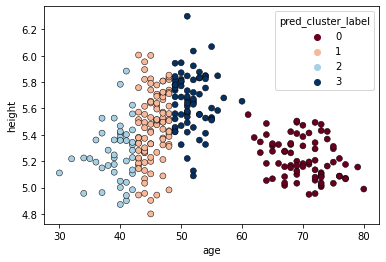

In [3]:
kmn_pipe = Pipeline([
    ('kmeans',KMeans(n_clusters=4))
])


X = df.loc[:,['age','height']].values
kmn_pipe.fit(X)

df['pred_cluster_label'] = kmn_pipe.predict(X)

sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'pred_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Question 3 (10 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

Answer here!

## Question 4 (10 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

<AxesSubplot:xlabel='age', ylabel='height'>

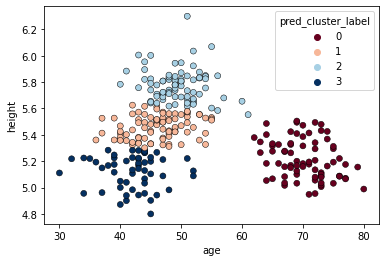

In [4]:
kmn_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('kmeans',KMeans(n_clusters=4))
])

kmn_pipe.fit(X)

df['pred_cluster_label'] = kmn_pipe.predict(X)

sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'pred_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Question 5 (10 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

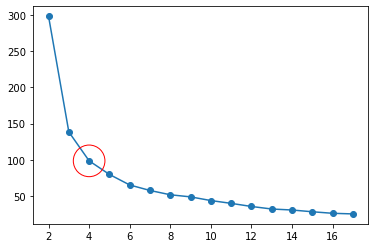

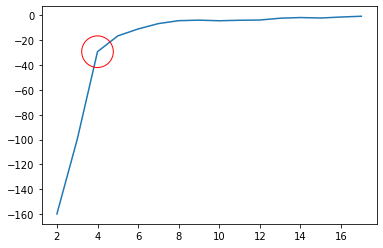

In [5]:
min_clusters = 2
max_clusters = int(np.sqrt(df.shape[0]))

num_clusters = range(min_clusters, max_clusters+1)
scores = []

for clusters in num_clusters:

    kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
    kmn_pipe.fit(X)
    scores.append(-kmn_pipe.score(X))

fig, ax = plt.subplots()
ax.plot(num_clusters, scores, marker = 'o')
ax.scatter(4, scores[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)

#Can also look at the derivative of the scores to find the elbow

fig, ax = plt.subplots()
plt.plot(num_clusters, np.gradient(scores))
ax.scatter(4, np.gradient(scores)[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)


## Question 6 (10 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

Answer here!


## Question 7 (40 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

Answer here!